# Super Data Science Community Project #26
Retail Pulse: Customer Journey Prediction & Marketing Impact Analysis!!!


### Quick Summary of the dataset
TechCorner Mobile Sales & Customer Insights is a real-world dataset capturing 10 months of mobile phone sales transactions from a retail shop in Bangladesh. This dataset was designed to analyze customer location, buying behavior, and the impact of Facebook marketing efforts.

The primary goal was to identify whether customers are from the local area (Rangamati Sadar, Inside Rangamati) or completely outside Rangamati. Since TechCorner operates a Facebook page, the dataset also includes insights into whether Facebook marketing is effectively reaching potential buyers.

Additionally, the dataset helps in determining:
✔ How many customers are new vs. returning buyers
✔ If customers are followers of the shop’s Facebook page
✔ Whether a customer was recommended by an existing buyer

[Link to Dataset](https://www.kaggle.com/datasets/shohinurpervezshohan/techcorner-mobile-purchase-and-engagement-data)

For versions of the libraries used for this analysis see [requirements.txt](requirements.txt)

In [1]:
## Import the basic data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### Load the dataset and Examine Characteristics

In [2]:
dataset = pd.read_csv('TechCorner_Sales_update.csv')
dataset.head()

,Cus.ID,Date,Cus. Location,Age,Gender,Mobile Name,Sell Price,Does he/she Come from Facebook Page?,Does he/she Followed Our Page?,Did he/she buy any mobile before?,Did he/she hear of our shop before?
0,1,27-05-2024,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2,27-05-2024,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,3,27-05-2024,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,4,27-05-2024,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,5,27-05-2024,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


Description of the continuous variables of the dataset

In [3]:
dataset.describe()

,Cus.ID,Age,Sell Price
count,8871.000000,8871.000000,8871.00000
mean,4436.000000,34.047007,25068.38654
std,2560.981452,9.592612,18032.80271
min,1.000000,18.000000,12702.00000
25%,2218.500000,26.000000,17466.50000
50%,4436.000000,34.000000,21682.00000
75%,6653.500000,42.000000,25777.50000
max,8871.000000,50.000000,200465.00000


Check basic summary and structure of the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cus.ID                                8871 non-null   int64  
 1   Date                                  8871 non-null   object 
 2   Cus. Location                         8871 non-null   object 
 3   Age                                   8871 non-null   int64  
 4   Gender                                8871 non-null   object 
 5   Mobile Name                           8871 non-null   object 
 6   Sell Price                            8871 non-null   float64
 7   Does he/she Come from Facebook Page?  8871 non-null   object 
 8   Does he/she Followed Our Page?        8871 non-null   object 
 9   Did he/she buy any mobile before?     8871 non-null   object 
 10  Did he/she hear of our shop before?   8871 non-null   object 
dtypes: float64(1), in

Data set has column 'Date' that will be converted to datatime64 data type for use in anaylsis. Columns with long names will be given shorter names for reference in code.

The description of the dataset indicates that Region Column will be encoded as Local or Non-Local

In [5]:
# rename columns to remove spaces and make them easier to work with
columns_renamed = {
    'Cus. Location': 'Location',
    'Mobile Name': 'Mobile_Name',
    'Sell Price': 'Sell_Price',
    'Does he/she Come from Facebook Page?': 'ComeFromFacebook',
    'Does he/she Followed Our Page?': 'FollowFacebookPage',
    'Did he/she buy any mobile before?': 'BoughtBefore',
    'Did he/she hear of our shop before?': 'HeardOfShopBefore'
}
dataset.rename(columns=columns_renamed, inplace=True)

# drop the Cus.ID column as it is not needed for analysis
dataset.drop(columns=['Cus.ID'], inplace=True)


Convert Date column into a datetime64 

In [6]:
dataset.Date = pd.to_datetime(dataset.Date, dayfirst=True) # Convert the Date column to datetime format
dataset.head()

,Date,Location,Age,Gender,Mobile_Name,Sell_Price,ComeFromFacebook,FollowFacebookPage,BoughtBefore,HeardOfShopBefore
0,2024-05-27,Rangamati Sadar,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2024-05-27,Inside Rangamati,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,2024-05-27,Rangamati Sadar,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,2024-05-27,Rangamati Sadar,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,2024-05-27,Outside Rangamati,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


In [7]:
# unique Locations
dataset.Location.unique()

array(['Rangamati Sadar', 'Inside Rangamati', 'Outside Rangamati'],
      dtype=object)

In [8]:
dataset['Location'] = dataset.Location.apply(
    lambda x: 'Local' if x in ['Rangamati Sadar', 'Inside Rangamati'] else 'Non-Local')
dataset.head()

,Date,Location,Age,Gender,Mobile_Name,Sell_Price,ComeFromFacebook,FollowFacebookPage,BoughtBefore,HeardOfShopBefore
0,2024-05-27,Local,49,F,Galaxy A55 5G 8/128,17073.0,No,Yes,No,Yes
1,2024-05-27,Local,44,M,Redmi Note 12 Pro 8/128,15546.0,Yes,No,No,Yes
2,2024-05-27,Local,45,M,R-70 Turbo 5G 6/128,26516.0,Yes,No,No,Yes
3,2024-05-27,Local,46,M,R-70 Turbo 5G 6/128,21927.0,No,No,No,Yes
4,2024-05-27,Non-Local,27,F,Vivo T3x 5G 8/128,16718.0,Yes,No,No,Yes


# Exploratory Data Analysis - EDA

### Distribution of the purchases by location

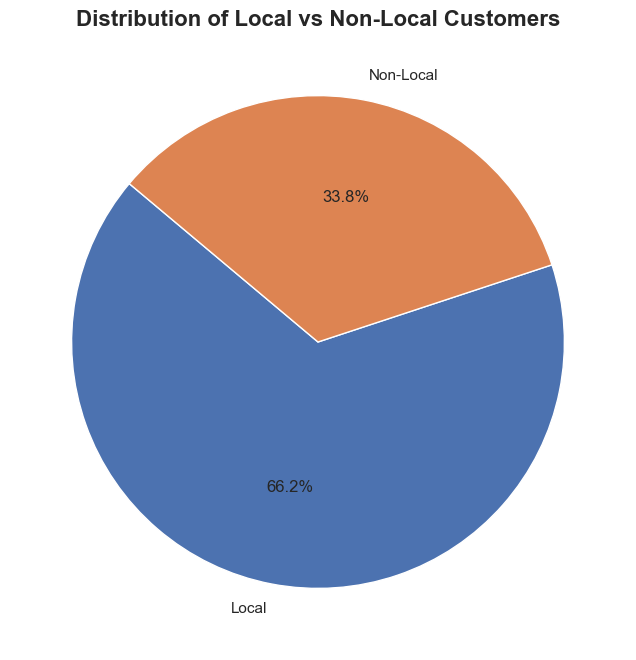

In [9]:
# use a pie chart to show the distribution of Local vs Non-Local customers
plt.figure(figsize=(12,8))
plt.pie(
    dataset.Location.value_counts(), 
    labels=dataset.Location.value_counts().index, 
    autopct='%1.1f%%', 
    startangle=140
    )
plt.title('Distribution of Local vs Non-Local Customers', fontsize=16, fontweight='bold')
plt.show()

The majority of customers 66.2 percent (66.2%) are local customers in the Rangamati region

### Distribution of the Age Demographic

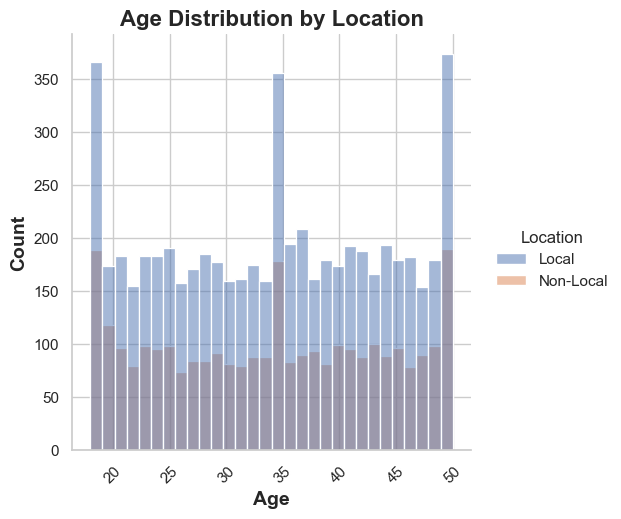

In [10]:

sns.displot(data=dataset, x='Age', bins=30, hue='Location')
plt.title('Age Distribution by Location', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()

The data shows three distinct age groups 18, 35, 50yo making majority of purchases by volume. This trend is seen across both Local and Non-Local regions. The distribution of the age groups shows little variation in total purchases for all other ages.

### Customer behaviour pattern
The customer behavious patter will be seen in the listing how customer have responded to Facebook, are new or returning customers.

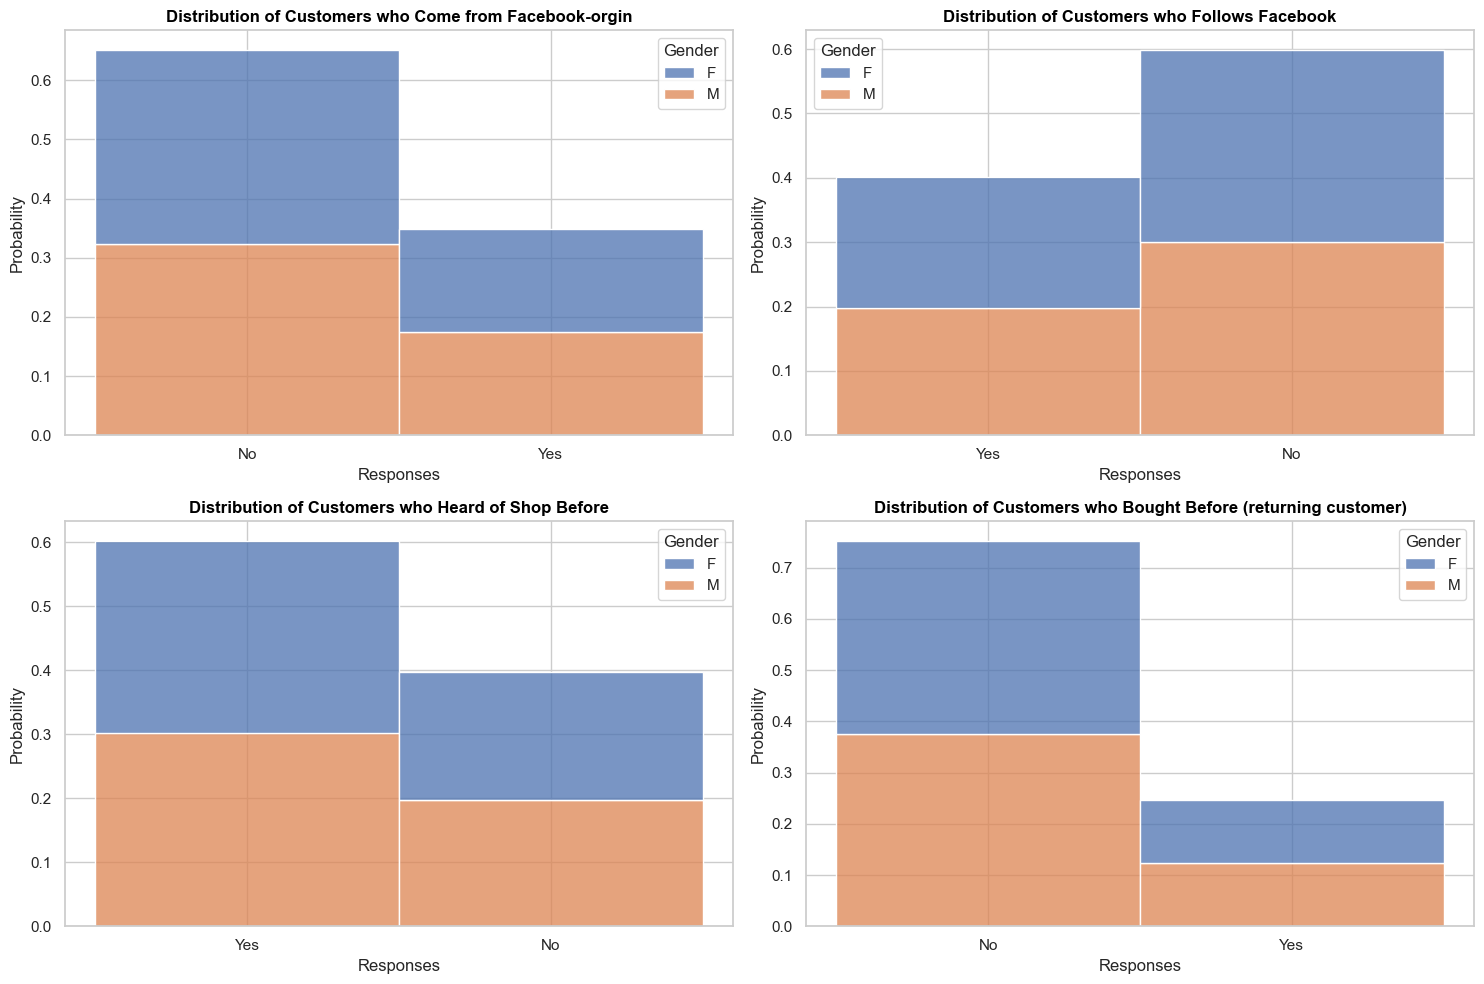

In [11]:
social_media_responses = {
    'ComeFromFacebook' : 'Come from Facebook-orgin',
    'FollowFacebookPage' : 'Follows Facebook', 
    'HeardOfShopBefore' : 'Heard of Shop Before', 
    'BoughtBefore': 'Bought Before (returning customer)'}
plt.figure(figsize=(15,10))
for i , responses in enumerate(list(social_media_responses.keys()), 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset, x=responses, bins=30, stat='probability', hue='Gender', multiple='stack')
    plt.title(f'Distribution of Customers who {social_media_responses[responses]}', {'fontweight':'bold', 'c': 'black'})
    plt.xlabel('Responses')
    plt.ylabel('Probability')
plt.tight_layout()
plt.show()

The gender demographic of all respondents to the yes/no questions has and even distribution between male and female. From the above, 35% of purchases came through Facebook. 75% of all purchases are from new customers.  

### Analysis of Customer Mobile Brand Preference

The mobile brands purchased by volume 

In [12]:
dataset.groupby(['Mobile_Name']).agg({'Sell_Price': 'mean', 'Mobile_Name': 'count'}).sort_values(by='Sell_Price', ascending=False)

,Sell_Price,Mobile_Name
Mobile_Name,,
iPhone 16 Pro Max 1TB,40967.778689,488
iPhone 16 Pro 256GB,33622.378119,521
Galaxy S24 Ultra 12/256,31138.757856,541
Pixel 8 Pro 12/256,29625.450281,533
Pixel 7a 8/128,26471.629344,518
Galaxy A55 5G 8/128,26346.226054,522
iQOO Neo 9 Pro 5G 12/256,25777.828685,502
Note 14 Pro 5G 8/256,24550.424242,495
Moto G85 5G 8/128,22295.037500,560
